#### NCSU GIS 714: Geospatial Computation and Simulations

# Tangible Landscape

Contents:
* Start GRASS GIS.
* Create a Python function which calls a tool from GRASS GIS.
* Create a Python script.
* Create a Python file for use in Tangible Landscape.
* Create a complete Tangible Landscape activity.

## Start GRASS GIS

In [ ]:
import os
import subprocess
import sys

# Ask GRASS GIS where its Python packages are.
# FOR WINDOWS:
# grass_call = "grass80"
# FOR MAC/LINUX
grass_call = "grass"

shell_setting = sys.platform.startswith('win')
sys.path.append(
    subprocess.check_output([grass_call, "--config", "python_path"], text=True, shell=shell_setting).strip()
)

# Import GRASS packages
import grass.script as gs
import grass.jupyter as gj



In [6]:
#import subprocess
import sys
sys.path.append('/Applications/GRASS-8.4.app/Contents/Resources/etc/python')

# Import GRASS packages
import grass.script as gs
import grass.jupyter as gj



In [8]:

# Start GRASS Session
gj.init("/Users/asumi/grassdata/nc_spm_08_grass7/user1")

## Python function

We will create a Python function which will call a GRASS tool called _r.slope.aspect_. First, we will test the code without using a function.

Before run the code, we will set the computational region to the _elevation_ raster which we will use in the examples:

In [2]:
gs.run_command("g.region", raster="elevation")

In [9]:
!g.region -p

projection: 99 (Lambert Conformal Conic)
zone:       0
datum:      nad83
ellipsoid:  a=6378137 es=0.006694380022900787
north:      228500
south:      215000
west:       630000
east:       645000
nsres:      10
ewres:      10
rows:       1350
cols:       1500
cells:      2025000


In [10]:
!g.list type=raster

above_stream
accum_mfd5K
accum_sfd5K
accum_strm_mfd5K
aspect
basin_50K
basin_mfd5K
basin_sfd5K
basin_strm_mfd5K
boundary_county_500m
cfactorbare_1m
cfactorgrow_1m
drainage
draindir_5K
draindir_sfd5K
draindir_strm_5K
el_D782_6m
el_D783_6m
el_D792_6m
el_D793_6m
elev_lid792_1m
elev_ned_30m
elev_srtm_30m
elev_state_500m
elevation
elevation_shade
facility
flood
flood1
flood2
flowacc
flowacc_vb
flowlg_vb
geology_30m
inundation_0.0
inundation_0.5
inundation_1.0
inundation_1.5
inundation_2.0
inundation_2.5
inundation_3.0
inundation_3.5
inundation_4.0
inundation_4.5
inundation_5.0
lake
lakes
landclass96
landcover_1m
landuse96_28m
lsat5_1987_10
lsat5_1987_20
lsat5_1987_30
lsat5_1987_40
lsat5_1987_50
lsat5_1987_60
lsat5_1987_70
lsat7_2000_10
lsat7_2000_20
lsat7_2000_30
lsat7_2000_40
lsat7_2000_50
lsat7_2000_61
lsat7_2000_70
lsat7_2000_80
lsat7_2002_10
lsat7_2002_20
lsat7_2002_30
lsat7_2002_40
lsat7_2002_50
lsat7_2002_61
lsat7_2002_62
lsat7_2002_70
lsat7_2002_80
ncmask_500m
new_dem
ortho_2001_t792

Now, it is time to test the analysis which in our case is just one call of the _r.slope.aspect_ tool:

In [3]:
gs.run_command("r.slope.aspect", elevation="elevation", slope="slope")

Look at the result (or run other tools to see if it works as expected):

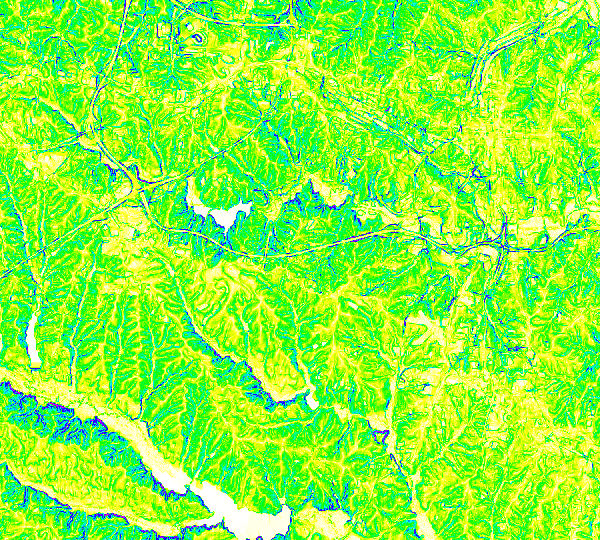

In [4]:
img = gj.Map()
img.d_rast(map="slope")
img.show()

If that works, let's put it into a Python function. Python function definition starts with `def` followed by a space, name of the function, parentheses which contain parameters, colon, and a function body which is an indented block of code. General syntax looks like this:

```python
def function_name(a, b):
    # code in the function, e.g.,
    return a + b
```

This function takes two parameters, adds them together with `+`, and returns the result.

Our function will have three parameters, namely _scanned_elev_, _env_, and `**kwargs`, because these are the parameters functions for Tangible Landscape must have. The function name will start with `run_` which is how Tangible Landscape will recognize that the function is meant to be used for data processing after Tangible Landscape scanned the physical surface. The _scanned_elev_ is name of the scanned surface. The _env_ parameter is the system environment variables and it needs to be passed to all functions which call GRASS tools such as the _run_command_ function. Finally, the special _kwargs_ parameter representes all the parameters which Tangible Landscape may be using but we are not using them in our function. This is documented at the [Tangible Landscape wiki](https://github.com/tangible-landscape/grass-tangible-landscape/wiki/Running-analyses-and-developing-workflows).

Here is our function which calls _r.slope.aspect_:

In [11]:
def run_slope(scanned_elev, env, **kwargs):
    gs.run_command("r.slope.aspect", elevation=scanned_elev, slope="slope", env=env)

Notably, the function takes the name of the elevation as a parameter _scanned_elev_, but it contains hardcoded name for the slope (`"slope"`). The name is hardcoded here because Tangible Landscape doesn't know what are the different raster or vector data created by the function.

The function is defined. Now we need to call (run) it. For _scanned_elev_, we will use the _elevation_ raster. For now, we set the _env_ parameter to _None_ (which is possible here given how it is used in the function) and we will get to it later. The special _kwargs_ parameter doesn't need any values, so we will just leave that out from the call completely.

Our function creates new raster data, but does not return any value, so in Python, we don't need to have any `return` statement.

Calling a custom function is compltely the same as calling any other function, so:

In [12]:
run_slope(scanned_elev="elevation", env=None)

Check the result:

north=228500
south=215000
east=645000
west=630000
nsres=10
ewres=10
rows=1350
cols=1500
cells=2025000
datatype=FCELL
ncats=39



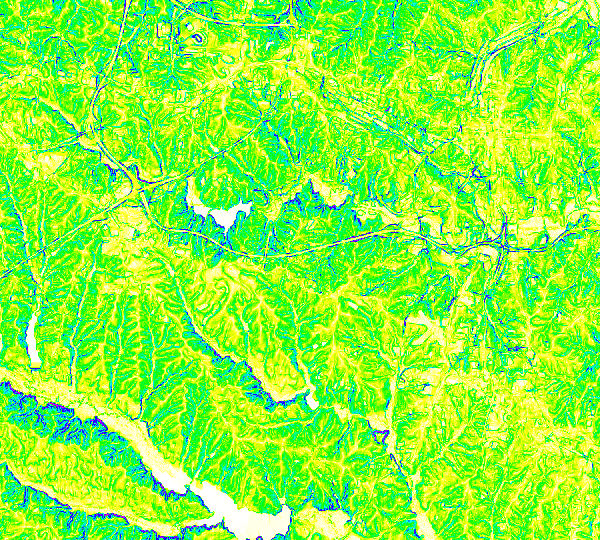

In [13]:
print(gs.read_command("r.info", map="slope", flags="g"))
img = gj.Map()
img.d_rast(map="slope")
img.show()

## Python script

A basic Python can have a very simple structure:

In [18]:
%%python
print("Hello!")

Hello!


Here, the `%%python` line is a IPython kernel magic telling the Jupyter notebook that the cell is a content of a file which should be executed as a Python script. The Python script itself has only one line and that is `print("Hello!")`. In a text editor, you would leave out the notebook-specific  `%%python`, but here we will continue using it so that running the cell actually executes its content as a Python script.

For our non-trivial Python script, we will use a slighly more complex structure which includes `#!` line as a first line, a main function called _main_, and the call of this function in a "if-name-equals-main" block. A full, but minimal, script has these seven lines:

In [15]:
%%python
#!/usr/bin/env python3

def main():
    pass

if __name__ == '__main__':
    main()

The block which starts with `if __name__ == '__main__'` is what Python will execute when the file is used as a Python script. To keep our code organized, we call there the _main_ function. The _main_ function now contains only `pass` which means tells Python to do nothing. We will replace this `pass` statement with our code. In a script we will create, all code we want to execute will be in the _main_ function, but we will also create other functions and call them from the _main_ function.

Finally, the `#!` line is called a shebang and is used on Linux and macOS and we won't be interacting with it. Note, again, that the `%%python` line is specific to Jupyter and it is not a part of the actual script.

## Python file for Tangible Landscape

A Python file for Tangible Landscape will be used in two ways: It will be used as a script when we test the functionality and it will be loaded by Tangible Landscape and only selected functions from the file will be executed.

The file uses the structure for a Python script described above. We add the _run_slope_ function we have defined earlier, and we add new code to the _main_ function. The complete file is:

In [19]:
%%python
#!/usr/bin/env python3

import os

import grass.script as gs


def run_slope(scanned_elev, env, **kwargs):
    gs.run_command("r.slope.aspect", elevation=scanned_elev, slope="slope", env=env)


def main():
    # Set up Environemnt like Tangible Landscape
    env = os.environ.copy()
    env["GRASS_OVERWRITE"] = "1"
    elevation = "elev_lid792_1m"
    elev_resampled = "elev_resampled"
    gs.run_command("g.region", raster=elevation, res=4, flags="a", env=env)
    gs.run_command("r.resamp.stats", input=elevation, output=elev_resampled, env=env)

    run_slope(scanned_elev=elev_resampled, env=env)


if __name__ == "__main__":
    main()

   0   5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85  90  95 100
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
Slope raster map <slope> complete


The new code in the _main_ function is used for testing of the _run_slope_ function outside of Tangible Landscape while creating conditions similar to how the _run_slope_ will be used in Tangible Landscape. Specifically, it creates a copy of the global system environment variables and uses that as the parameter _env_. It also modifies the environment to ensure that old data can replaced by new data bt modifying the `GRASS_OVERWRITE` environment variable. It uses a raster with similar size as the data in Tangible Landscape and to mimic the Tangible Landscape inputs even closer, it resamples the raster to a coarser resolution. This part will stay the same for most cases.

The most important part of the _main_ function is the call of the _run_slope_ function. We can define any number of these `run_` functions and call them here. Tangible Landscape will ignore the _main_ function, but it will execute all `run_` functions in the file providing its own parameters.

Rendering is not part of the script because it happens in Tangible Landscape, but we can render the result separately here in the notebook:

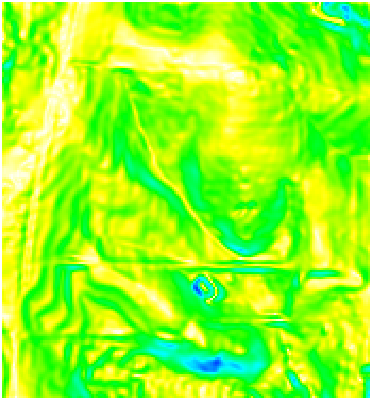

In [21]:
img = gj.Map()
img.d_rast(map="slope")
img.show()

## Creating a complete activity for Tangible Landscape

To create a complete activity, you will need to create two files. A Python file, described above, and a JSON file.

First, we will create the Python file. This time, we want to create an actual file, so instead of the `%%python` magic, we use the `%%file` magic which takes the contents of the cells and puts it into a file with the file name we specify after `%%file`. You can just copy-paste the complete code developed in the previous section.

In [22]:
%%file asumi.py
#!/usr/bin/env python3

import os

import grass.script as gs


def run_slope(scanned_elev, env, **kwargs):
    gs.run_command("r.slope.aspect", elevation=scanned_elev, slope="slope", env=env)


def main():
    env = os.environ.copy()
    env["GRASS_OVERWRITE"] = "1"
    elevation = "elev_lid792_1m"
    elev_resampled = "elev_resampled"
    gs.run_command("g.region", raster=elevation, res=4, flags="a", env=env)
    gs.run_command("r.resamp.stats", input=elevation, output=elev_resampled, env=env)

    run_slope(scanned_elev=elev_resampled, env=env)


if __name__ == "__main__":
    main()

Writing asumi.py


A complete Tangible Landscape activity requires also a JSON file which tells Tangible Landscape what to display on the physical model.

In [23]:
%%file asumi.json # rename the file name
{
  "tasks": [
    {
      "layers": [
        ["d.rast", "map=slope"]
      ],
      "base": "elev_lid792_1m",
      "scanning_params": {
        "smooth": 10,
        "zexag": 2,
        "numscans": 1,
        "interpolate": true
      },
      "analyses": "simple_example.py", # Rename the file name
      "title": "Slope and Contours",
      "author": "Example Contributor",
      "instructions": "Change topography and observe changes in slope and contours."
    }
  ]
}

Writing asumi.json


The layers for display are specified using GRASS display commands, such as *d.rast*, specified as a list of strings in this JSON file. Additionally, the files specifies scanning parameters and base raster (no need to change any of those), and finally, it specifies what Python file should be used and what are the metadata for the action (title, authors, and user instructions).

## Next steps

* See more examples at [FOSS4G_NA workshop: Tangible_Landscape](https://grasswiki.osgeo.org/wiki/Using_GRASS_GIS_through_Python_and_tangible_interfaces_(workshop_at_FOSS4G_NA_2016)#Tangible_Landscape).
* See additional instructions on creating an activity in the [ncsu-geoforall-lab/gis714-2022-tangible-landscape](https://github.com/ncsu-geoforall-lab/gis714-2022-tangible-landscape) repository.
* Add your own activity to the above repository by creating a pull request.

### Additional Information
* [Website](https://github.com/ncsu-geoforall-lab/geospatial-simulations-course)
    
* [Computing Help](https://help.ncsu.edu/)
    
* [GIST Home](https://geospatial.ncsu.edu/)
    
* [Disclaimer](https://www.ncsu.edu/policies/prr-disclaimer.php)
    
* [Accessibility](https://oit.ncsu.edu/itaccess)

* License: 2018 [CC BY-SA](https://creativecommons.org/licenses/by-sa/4.0/)
  
* [NCSU GeoForAll Lab](https://geospatial.ncsu.edu/geoforall/)